# Baseline Neural Network

### Focus on Electrode 5

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import numpy as np
import json
import pandas as pd
import numpy as np
import time
import string
from matplotlib import pyplot as plt
import tensorflow as tf
import sys
sys.path.append('../../')
from brain2brain import utils, generators, models
%matplotlib inline

# TF
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# TCN
from brain2brain.tcn import TCN
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Flatten, GRU, LSTM, RepeatVector, TimeDistributed

from scipy.stats import pearsonr

from brain2brain import utils, models

In [18]:
train_bin_norm_paths = utils.get_file_paths("/home/tmarcu/brain2brain/brain2brain/train_676_bin_norm_2.txt")
val_bin_norm_paths = utils.get_file_paths("/home/tmarcu/brain2brain/brain2brain/val_676_bin_norm_2.txt")
total_electrode_count = utils.get_file_shape(train_bin_norm_paths[0])[1]
# Electrodes
electrode_count = 1
electrode = 5
# Training Generator
train_generator = generators.FGenerator(file_paths=train_bin_norm_paths,
                                        lookback=50,
                                        length=10,
                                        delay=0,
                                        batch_size=1024,
                                        sample_period=1,
                                        electrodes=[electrode],
                                        electrode_output_ix=electrode,
                                        shuffle=True)
# Validation Generator
val_generator = generators.FGenerator(file_paths=val_bin_norm_paths,
                                        lookback=50,
                                        length=10,
                                        delay=0,
                                        batch_size=1024,
                                        sample_period=1,
                                        electrodes=[electrode],
                                        electrode_output_ix=electrode,
                                        shuffle=False)

(5429, 114)


In [19]:
train_generator[0][1].shape

(1024, 10, 1)

In [26]:
hidden_units = 256
output_dim = 10
input_len = 50
model = models.define_baseline_nn_model_o2o(hidden_units,input_len, output_dim)
model.compile(optimizer=RMSprop(), loss='logcosh')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50, 256)           512       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                128010    
Total params: 128,522
Trainable params: 128,522
Non-trainable params: 0
_________________________________________________________________


In [27]:
callback_list = [
#         EarlyStopping(
#             monitor="val_loss",
#             patience=5,
#             mode="min"
#         )
]
history = model.fit_generator(generator=train_generator,
                              callbacks=callback_list,
                              epochs=100,
                              validation_data=val_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 8 steps
Epoch 1/100
25/25 [==============================] - 5s 205ms/step - loss: 0.2743 - val_loss: 0.2364
Epoch 2/100
25/25 [==============================] - 4s 180ms/step - loss: 0.2424 - val_loss: 0.2411
Epoch 3/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2431 - val_loss: 0.2211
Epoch 4/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2364 - val_loss: 0.2284
Epoch 5/100
25/25 [==============================] - 4s 174ms/step - loss: 0.2325 - val_loss: 0.2344
Epoch 6/100
25/25 [==============================] - 4s 178ms/step - loss: 0.2325 - val_loss: 0.2200
Epoch 7/100
25/25 [==============================] - 6s 234ms/step - loss: 0.2296 - val_loss: 0.2356
Epoch 8/100
25/25 [==============================] - 5s 212ms/step - loss: 0.2294 - val_loss: 0.2185
Epoch 9/100
25/25 [==============================] - 4s 180ms/step - loss: 0.2284 - val_loss: 0.2204


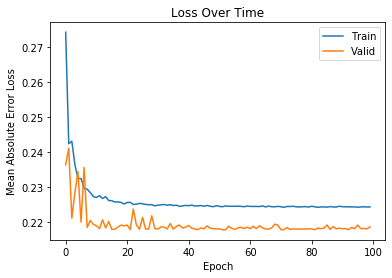

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])